In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Centers and colocation points:
eps = 0.001

cantidad_de_centros = 30
cantidad_de_puntos_en_x = 100
xk = np.linspace(-eps,1-eps,cantidad_de_centros)

xk2 = np.linspace(0,1,cantidad_de_centros + 1)
x = np.linspace(eps,1-eps,cantidad_de_puntos_en_x)

In [3]:
def euclidian_dist(x,xk):
    return np.abs(x.reshape(-1,1) - xk.reshape(1,-1))

In [4]:
def gaussian_rbf(x,xk,sigma = 2):
    return np.exp(-(sigma*euclidian_dist(x,xk))**2)  

In [ ]:
def switch_function(x,xk):
    return np.abs(x.reshape(-1,1)-xk.reshape(1,-1))/(x.reshape(-1,1)-xk.reshape(1,-1))

In [ ]:
def gaussian_rbf_first_order(x,xk,sigma=2):
    return -2*sigma**2*euclidian_dist(x,xk)*np.exp(-(sigma*euclidian_dist(x,xk))**2)*switch_function(x,xk)

In [ ]:
def gaussian_rbf_second_order(x,xk,sigma=2):
    return 2*sigma**2*np.exp(-(sigma*euclidian_dist(x,xk))**2)*(2*sigma**2*euclidian_dist(x,xk)**2-1)

In [ ]:
def f(x):
    return np.sin(2*np.pi*x)  

In [ ]:
def true_f(x):
    return -np.cos(2*np.pi*x)/(2*np.pi) + 1

In [ ]:
transformation = np.zeros((cantidad_de_centros,cantidad_de_centros))
transformation.shape

(30, 30)

In [ ]:
def predict(xk,xk2,yk,x,bc1,sigma = 2):
    
    g = np.zeros(cantidad_de_centros+1)
    g[0] = bc1
    g[1:] = yk

    transformation = np.zeros((cantidad_de_centros+1,cantidad_de_centros+1))
    transformation[1:,:] = gaussian_rbf_first_order(xk,xk2)

    transformation[0,:] += gaussian_rbf(np.zeros(1),xk2).flatten()
    print(transformation)
    weight = np.linalg.solve(transformation,g)
    print(transformation.shape, weight.shape)
    transformation = gaussian_rbf(x,xk2)
    
    return np.dot(transformation,weight)

In [ ]:
prediction2 = predict(xk,xk2,f(xk),x,-1/(2*np.pi) + 1)

[[ 1.00000000e+00  9.95565417e-01  9.82379315e-01  9.60789439e-01
   9.31358402e-01  8.94839317e-01  8.52143789e-01  8.04304156e-01
   7.52432156e-01  6.97676326e-01  6.41180388e-01  5.84044688e-01
   5.27292424e-01  4.71841992e-01  4.18486306e-01  3.67879441e-01
   3.20530521e-01  2.76804321e-01  2.36927759e-01  2.01001191e-01
   1.69013315e-01  1.40858421e-01  1.16354803e-01  9.52632553e-02
   7.73047404e-02  6.21765240e-02  4.95662835e-02  3.91638951e-02
   3.06707930e-02  2.38069487e-02  1.83156389e-02]
 [ 7.99996800e-03  2.73374631e-01  5.31508995e-01  7.75693958e-01
   9.99828773e-01  1.19867370e+00  1.36805110e+00  1.50498423e+00
   1.60776805e+00  1.67597071e+00  1.71036988e+00  1.71283156e+00
   1.68614303e+00  1.63381337e+00  1.55985616e+00  1.46856886e+00
   1.36432211e+00  1.25136991e+00  1.13368932e+00  1.01485498e+00
   8.97950979e-01  7.85519615e-01  6.79544569e-01  5.81463795e-01
   4.92206571e-01  4.12248408e-01  3.41677524e-01  2.80267022e-01
   2.27547656e-01  1.8287

In [ ]:
#yk = f(xk)
#g = np.zeros(cantidad_de_centros+1)
#g[0] = -1/(2*np.pi) + 1
#g[1:] = yk

#transformation = np.zeros((cantidad_de_centros+1,cantidad_de_centros+1))
#transformation[1:,:] = gaussian_rbf_first_order(xk,extended_x2)

#transformation[0,:] += gaussian_rbf(np.zeros(1),extended_x2).flatten()
#print(transformation)
#weight = np.linalg.solve(transformation,g)
#print(transformation.shape, weight.shape)
#transformation = gaussian_rbf(x,extended_x2)
#prediction = np.dot(transformation,weight)


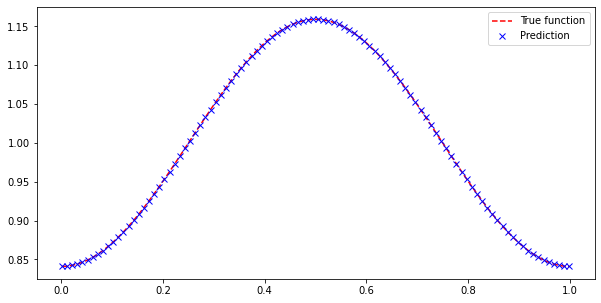

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(x,true_f(x),'--r', label = 'True function')
plt.plot(x,prediction2,'x b', label = 'Prediction')
plt.legend()
plt.show()

In [ ]:
def Harmonic_Oscilator(xk,xk2,yk,x,bc1,bc2, sigma = 2):
    g = np.zeros(cantidad_de_centros+2)
    g[0] = bc1
    g[-1] = bc2
    g[1:-1] = yk
    
    transformation = np.zeros((cantidad_de_centros+2,cantidad_de_centros+2))
    transformation[1:-1,:] = gaussian_rbf_first_order(xk,xk2)
    transformation[0,:] += gaussian_rbf(np.zeros(1),xk2).flatten()
    transformation[-1,:] += gaussian_rbf(np.ones(1),xk2).flatten()
    weight = np.linalg.solve(transformation,g)
    transformation = gaussian_rbf(x,xk2)
    return np.dot(transformation,weight)

In [ ]:
extended_x2 = np.linspace(0,1,cantidad_de_centros + 2)
euclidian_dist(xk,extended_x2)

array([[1.00000000e-03, 3.32580645e-02, 6.55161290e-02, 9.77741935e-02,
        1.30032258e-01, 1.62290323e-01, 1.94548387e-01, 2.26806452e-01,
        2.59064516e-01, 2.91322581e-01, 3.23580645e-01, 3.55838710e-01,
        3.88096774e-01, 4.20354839e-01, 4.52612903e-01, 4.84870968e-01,
        5.17129032e-01, 5.49387097e-01, 5.81645161e-01, 6.13903226e-01,
        6.46161290e-01, 6.78419355e-01, 7.10677419e-01, 7.42935484e-01,
        7.75193548e-01, 8.07451613e-01, 8.39709677e-01, 8.71967742e-01,
        9.04225806e-01, 9.36483871e-01, 9.68741935e-01, 1.00100000e+00],
       [3.34827586e-02, 1.22469410e-03, 3.10333704e-02, 6.32914349e-02,
        9.55494994e-02, 1.27807564e-01, 1.60065628e-01, 1.92323693e-01,
        2.24581758e-01, 2.56839822e-01, 2.89097887e-01, 3.21355951e-01,
        3.53614016e-01, 3.85872080e-01, 4.18130145e-01, 4.50388209e-01,
        4.82646274e-01, 5.14904338e-01, 5.47162403e-01, 5.79420467e-01,
        6.11678532e-01, 6.43936596e-01, 6.76194661e-01, 7.08452

In [ ]:
g = np.zeros(cantidad_de_centros+2)
g[0] = 0
g[-1] = 2
g[1:-1] = 0

extended_x2 = np.linspace(0,1,cantidad_de_centros + 2)
transformation = np.zeros((cantidad_de_centros+2,cantidad_de_centros+2))
transformation[1:-1,:] = gaussian_rbf_second_order(xk,extended_x2) + 280* gaussian_rbf(xk,extended_x2)
transformation[0,:] += gaussian_rbf(np.zeros(1),extended_x2).flatten()
transformation[-1,:] += gaussian_rbf(np.ones(1),extended_x2).flatten()

weight = np.linalg.solve(transformation,g)
transformation = gaussian_rbf(x,extended_x2)
prediction = np.dot(transformation,weight)

print(transformation)

[[0.999996   0.99609936 0.98399231 ... 0.03040828 0.02379309 0.01846268]
 [0.99950898 0.9982077  0.98864364 ... 0.03277517 0.02571188 0.02000357]
 [0.99821035 0.9995076  0.99250974 ... 0.03529758 0.02776283 0.02165545]
 ...
 [0.02165545 0.02776283 0.03529758 ... 0.99250974 0.9995076  0.99821035]
 [0.02000357 0.02571188 0.03277517 ... 0.98864364 0.9982077  0.99950898]
 [0.01846268 0.02379309 0.03040828 ... 0.98399231 0.99609936 0.999996  ]]


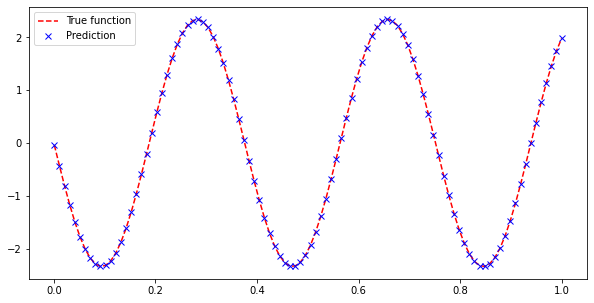

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x,np.sin(x*280**0.5) * 2/np.sin(280**0.5),'--r', label = 'True function')
plt.plot(x,prediction,'x b', label = 'Prediction')
plt.legend()
plt.show()

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GaussianNoise

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GaussianNoise

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
input_shape =(10,)
inputs = Input(shape=input_shape)
inputs

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'input_2')>

In [6]:
noisy_inputs = GaussianNoise(0.1)(inputs)

In [7]:
noisy_inputs

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'gaussian_noise')>